# Chapter 17. Less Commonly Used Time-Frequency Decomposition Methods

In [1]:
import numpy as np
import scipy.io
from matplotlib import pyplot as plt

from numpy import pi, sin, cos, exp, sqrt, log,log10, random, convolve#import basic functions from numpy that we'll need
from numpy.fft import fft, ifft

Import optional library for prettier plots

In [2]:
data = scipy.io.loadmat('sampleEEGdata')

In [3]:
EEGdata = data["EEG"][0,0]["data"]
EEGpnts = data["EEG"][0,0]["pnts"][0,0] #number of points in EEG data
EEGtimes = data["EEG"][0,0]["times"][0]
EEGsrate = float(data["EEG"][0,0]["srate"][0]) #make float for division purposes later
EEGtrials = data["EEG"][0,0]["trials"][0,0]

eegdata = np.squeeze(EEGdata[46,:,9])

### Figure 17.1

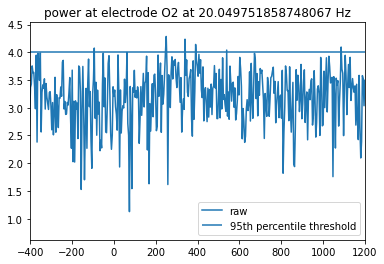

In [5]:
num_frex = 6
frex = np.logspace(log10(4),log10(30),num_frex)
s = 6/(2*pi*frex)
time = np.arange(-1,1 + 1/EEGsrate,1/EEGsrate)

#we don't need the wavelet itself, we need the FFT of the wavelet

mwaves = np.zeros([num_frex,len(time)]) * 1j #preallocate complex arrays
swaves = np.zeros([num_frex,len(time)]) * 1j

for fi in range(num_frex):
    #create morlet wavelets and s-transforms
    #scaling factors omitted to focus on shape of the function
    mwaves[fi,:] = exp(2*1j*pi*frex[fi]*time) * exp(-time**2/(2*s[fi]**2))
    swaves[fi,:] = exp(2*1j*pi*frex[fi]*time) * exp(-time**2 * frex[fi]**2 / 2)
    
time = np.arange(-1,1+ 1/EEGsrate,1/EEGsrate)
n_wavelet = len(time)
n_data = EEGpnts * EEGtrials
n_conv = n_wavelet + n_data - 1
half_wave = (len(time))//2

#fft of eeg signal
eegfft = fft(np.reshape(EEGdata[63,:,:],[1,EEGpnts*EEGtrials]),n_conv)

#convolution
eegconv = ifft(fft(mwaves[4,:],n_conv)*eegfft)
eegconv = eegconv[0,half_wave:-half_wave]

#reshape to time X trials
eegpower = log10(np.absolute(np.reshape(eegconv,[EEGpnts,EEGtrials]))**2)

plt.plot(EEGtimes,eegpower[:,50])
plt.xlim([-400,1200])
threshold = np.percentile(eegpower[:],95)
plt.hlines(threshold,-400,1200) #plot threshold line
plt.legend(["raw","95th percentile threshold"])
channel = data["EEG"][0,0]["chanlocs"][0,63]["labels"][0]
_=plt.title("power at electrode " + channel + " at " + str(frex[4]) + " Hz")


### Figure 17.2

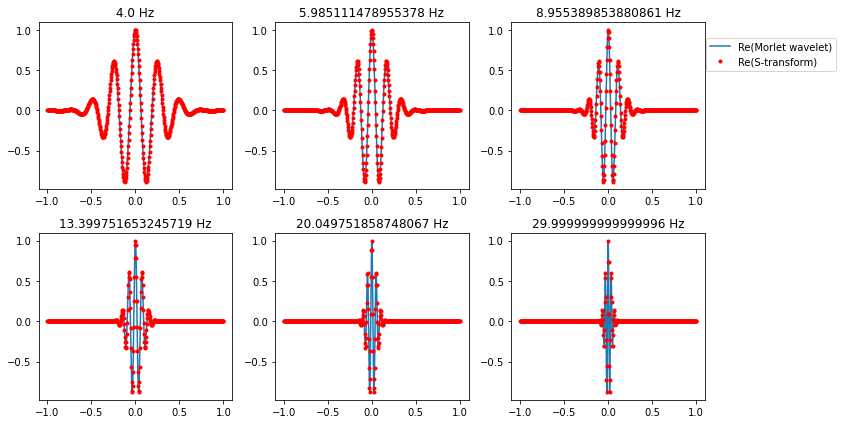

In [6]:
fig=plt.figure(figsize=(10,6))
for ii in range(num_frex):
    plt.subplot(2,3,ii+1)
    plt.plot(time,np.real(mwaves[ii,:]))
    plt.plot(time,np.real(swaves[ii,:]),'r.')
    plt.title(str(frex[ii]) + " Hz")

plt.tight_layout()
_=plt.legend(["Re(Morlet wavelet)","Re(S-transform)"], bbox_to_anchor=[1.7,2.2])
